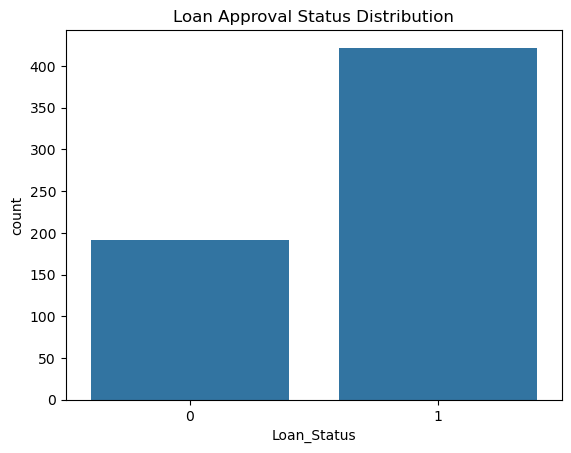

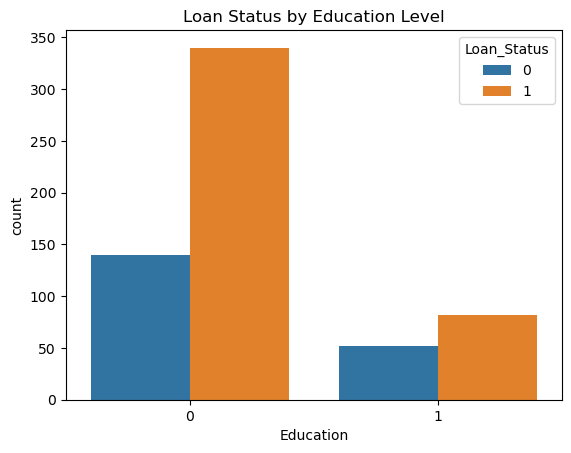

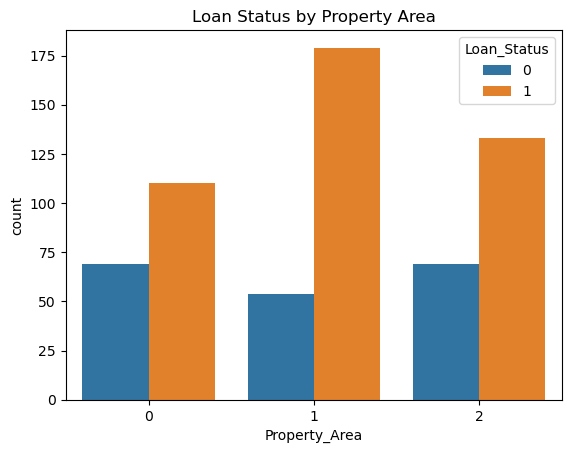

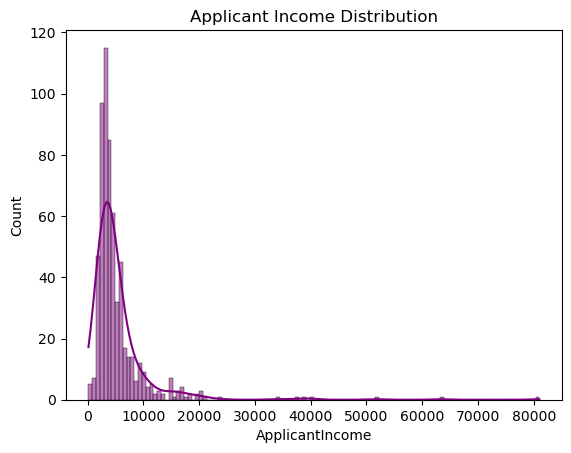

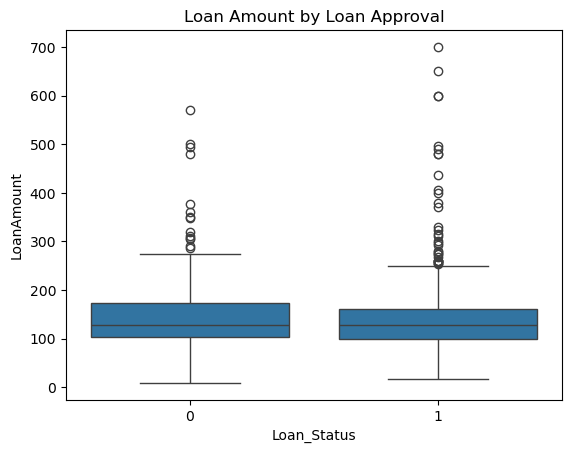

Validation Accuracy: 0.7886178861788617

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Sample Submission:
    Loan_ID Loan_Status
0  LP001015   Semiurban
1  LP001022   Semiurban
2  LP001031   Semiurban
3  LP001035   Semiurban
4  LP001051   Semiurban


In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load Data
train_df = pd.read_csv("loantrain.csv")
test_df = pd.read_csv("loantest.csv")

# Drop Loan_ID
train_df.drop("Loan_ID", axis=1, inplace=True)
test_ids = test_df["Loan_ID"]
test_df.drop("Loan_ID", axis=1, inplace=True)

# Fill Missing Values
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(train_df[col].mode()[0], inplace=True)

train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
test_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

# Label Encoding
le = LabelEncoder()
for col in train_df.select_dtypes(include='object').columns:
    train_df[col] = le.fit_transform(train_df[col])
for col in test_df.select_dtypes(include='object').columns:
    test_df[col] = le.fit_transform(test_df[col])

# ----------------------------- EDA Visualizations -----------------------------

# 1. Loan Status Distribution
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Loan Approval Status Distribution')
plt.show()

# 2. Loan Status by Education
sns.countplot(x='Education', hue='Loan_Status', data=train_df)
plt.title('Loan Status by Education Level')
plt.show()

# 3. Loan Status by Property Area
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_df)
plt.title('Loan Status by Property Area')
plt.show()

# 4. Applicant Income Distribution
sns.histplot(train_df['ApplicantIncome'], kde=True, color='purple')
plt.title('Applicant Income Distribution')
plt.show()

# 5. LoanAmount by Loan Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_df)
plt.title('Loan Amount by Loan Approval')
plt.show()

# ----------------------------- Modeling -----------------------------

# Split features and target
X = train_df.drop("Loan_Status", axis=1)
y = train_df["Loan_Status"]

# Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
val_preds = model.predict(X_val)

# Evaluation
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, val_preds))
print("\nClassification Report:\n", classification_report(y_val, val_preds))

# ----------------------------- Final Prediction -----------------------------

# Predict on Test Dataset
final_preds = model.predict(test_df)

# Submission DataFrame
submission = pd.DataFrame({
    'Loan_ID': test_ids,
    'Loan_Status': le.inverse_transform(final_preds)  # Convert 0/1 back to 'Y'/'N'
})

# Show Sample Submission
print("\nSample Submission:")
print(submission.head())
